1) Loading data
('CRITERION:', 0.36825948272704162)
NMI: 0.930673152976
ARI: 0.959306989875
ACCURACY:0.986378822925


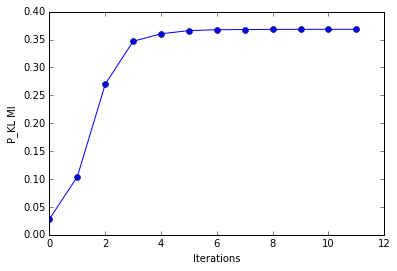

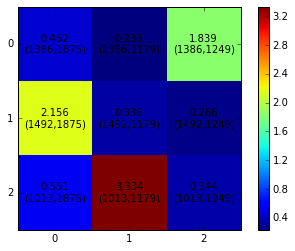

In [6]:
%matplotlib inline
import scipy.io as io
from sklearn.metrics import confusion_matrix
from coclust.CoclustInfo import CoclustInfo
from coclust.utils.evaluation import (print_NMI_and_ARI,
                                      plot_convergence,
                                      print_accuracy,
                                      plot_delta_kl)
# Retrieve the Classic3  document-term matrix from a matlab file
print("1) Loading data")
file_name = "../datasets/classic3.mat"
matlab_dict = io.loadmat(file_name)
X = matlab_dict['A']

# Create and fit a model with 3 co-clusters
model = CoclustInfo(n_row_clusters=3, n_col_clusters=3, n_init=4, random_state=0)
model.fit(X)

# Evaluate the results
print("CRITERION:", model.criterion)
true_row_labels = matlab_dict['labels'].flatten()
predicted_row_labels = model.row_labels_
print_NMI_and_ARI(true_row_labels, predicted_row_labels)
cm = confusion_matrix(true_row_labels, predicted_row_labels)
print_accuracy(cm, X.shape[0], 3)

# Show convergence
plot_convergence(model.criterions, 'P_KL MI', marker='o')


plot_delta_kl(model.delta_kl_, model)